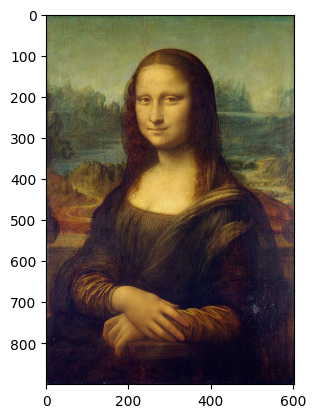

In [1]:
from PIL import Image
from matplotlib import pylab as plt
import numpy as np
from random import randint
%matplotlib inline

MonaLisa = Image.open("Mona_Lisa.jpeg")
MonaLisa_NPArray = np.asarray(MonaLisa)
plt.imshow(MonaLisa_NPArray)
plt.show()

**2b and 2c) Preprocessing input and output**

There is no pre-processing required for the inputs due to the following reason:

In this dataset, there are no missing values, no outliers and no categorical variables.
Random Forests are robust to different scales and types of features.
Moreover, Random Forests do not require feature scaling since the algorithm's decision-making process isn't affected by different scales of features. Therefore, mean subtraction, standardization, or unit normalization aren't necessary for Random Forests.

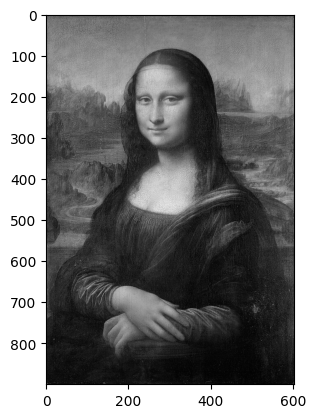

In [2]:
#Preprocessing Output: Turn to Grayscale
MonaLisa_Gray = MonaLisa.convert("L")
MonaLisa_Gray_NPArray = np.asarray(MonaLisa_Gray)
plt.imshow(MonaLisa_Gray_NPArray, cmap='gray')
plt.show()

height = MonaLisa_Gray_NPArray.shape[0]
width = MonaLisa_Gray_NPArray.shape[1]

random_Points = [] #5000 random coordinates
weight = [] # Grayscale pixel brightness
for i in range(5000):
    ran_row = randint(0, height-1)
    ran_col = randint(0, width-1)
    random_Points.append([ran_row, ran_col])
    gray_brightness = MonaLisa_Gray.getpixel((ran_col,ran_row)) #getpixel(x,y);
    weight.append(gray_brightness)

In [3]:
all_pixel_coordinates=[]
for i in range(height):
    for j in range (width):
        all_pixel_coordinates.append((i,j))
print('total number of pixels:', len(all_pixel_coordinates))

total number of pixels: 543600


**2d) Building the final image using random forest model prediction**

I have used RandomForestRegressor which is part of the ensemble methods in machine learning, specifically a part of the Random Forest algorithm. It operates by constructing multiple decision trees during training and outputting the average prediction of the individual trees for regression tasks.

Source:

scikit-learn documentation: https://scikit-learn.org/stable/modules/ensemble.html#forest

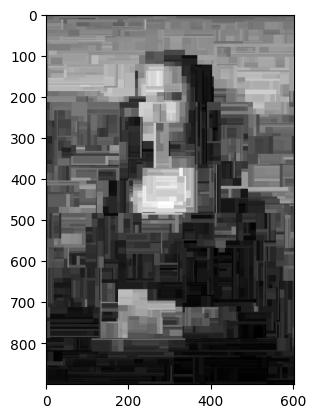

In [4]:
from sklearn.ensemble import RandomForestRegressor

def RF_experimentation (depth=None, num_trees = 1, title=None):
    RF = RandomForestRegressor(max_depth=depth, n_estimators=num_trees)
    RF.fit(random_Points, weight)
    prediction = RF.predict(all_pixel_coordinates) / 255
    plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
    if title != None:
        plt.title(title)
    plt.show()
    return RF

RF = RF_experimentation()

**2e) Experimentation**

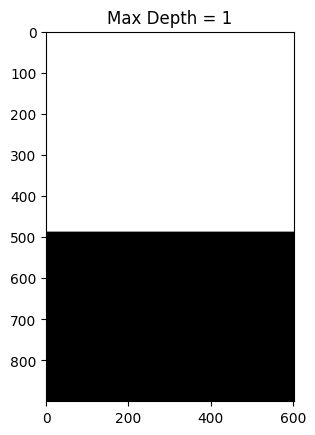

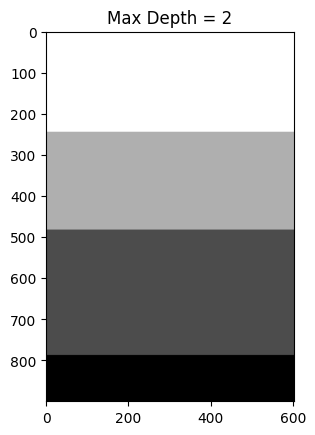

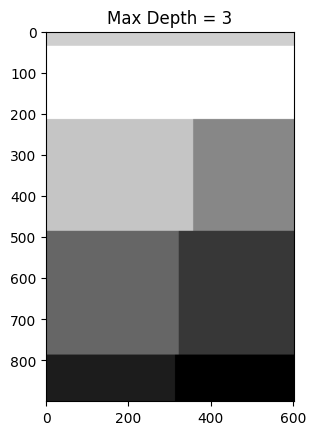

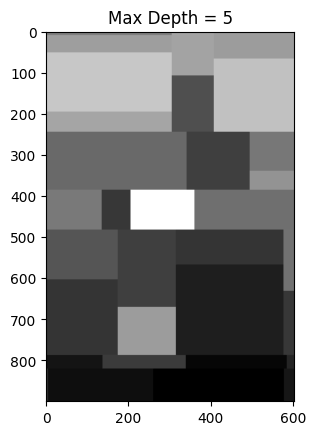

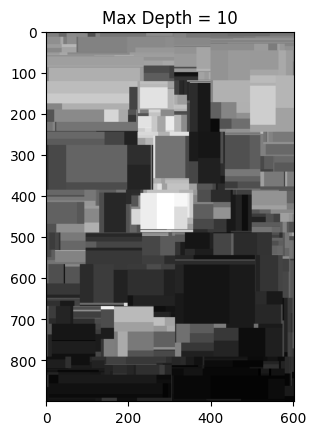

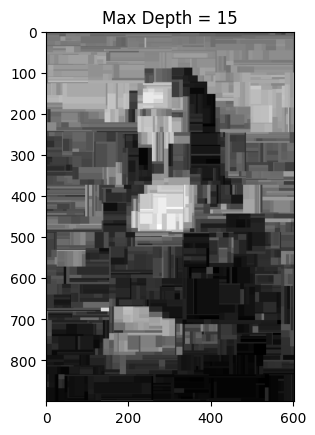

In [5]:
#variable depths
all_depths = [1,2,3,5,10,15]
for depth in all_depths:
    RF = RF_experimentation(depth, 1, "Max Depth = " + str(depth))

**Impact of varying depth:**

**Low Depth** (e.g., 1 or 2) represents a shallow tree which does not capture the complexities of the data. It tends to generalize too much and might underfit, resulting in oversimplified predictions. This also leads to the visualization being blurred and provides an oversimplified version of the image, lacking finer details.

**High Depth** (e.g., 10 or 15): represents deeper trees which can capture more intricate patterns in the data, potentially leading to overfitting if the depth is too high. This means the model might learn noise in the training data and perform poorly on unseen data. Therefore, optimal choice of depth is crucuial in this setting. From the visualization perspective, it shows clearer details and captures intricate patterns

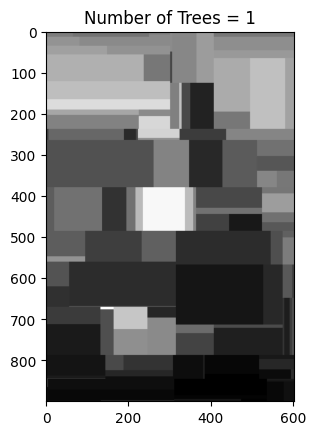

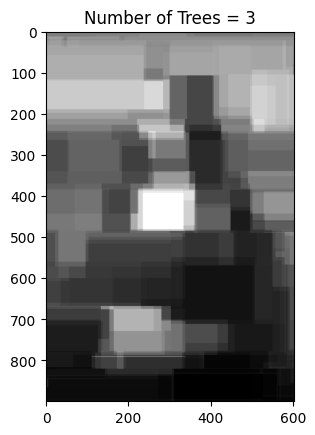

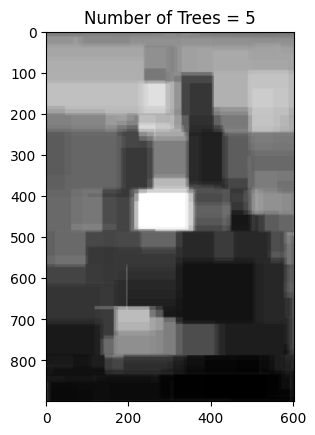

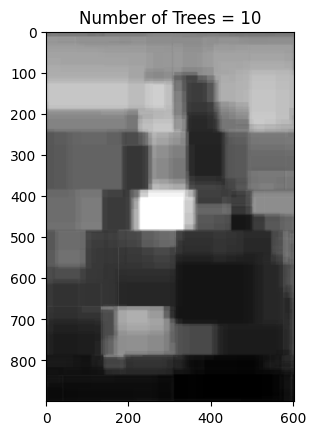

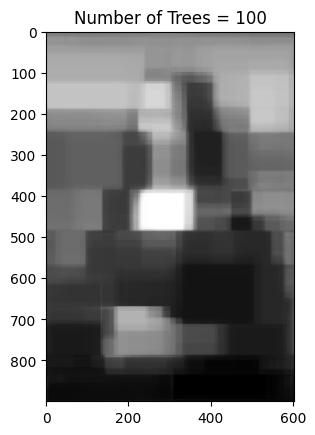

In [6]:
#variable number of trees
num_of_trees = [1,3,5,10,100]
for single_numOfTrees in num_of_trees:
    RF = RF_experimentation(7, single_numOfTrees, "Number of Trees = " + str(single_numOfTrees))

The number of trees in a Random Forest Regressor influences the model's predictive power, robustness, and computation time.

**Fewer Trees** (e.g., 1 or 3): A small number of trees might not capture the full complexity of the data. The predictions might be less accurate and more prone to noise in the training data. Also, training a model with fewer trees is computationally less expensive compared to training with more trees.

The visualization shows a rough and less refined representation of the image with more noise.

**More Trees** (e.g., 10 or 100): Increasing the number of trees generally improves predictive performance. More trees reduce the variance and stabilize the model's predictions by averaging over multiple estimators.

The visualization shows a more refined representation with reduced noise

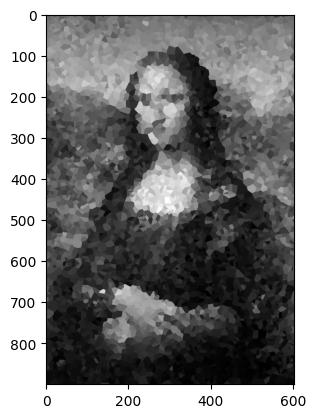

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(random_Points, weight)
prediction = model.predict(all_pixel_coordinates) / 255
plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
plt.show()

**Pruning Analysis**

In [8]:
def pruning_experimentation (depth=None, n_estimators=10, min_samples_split = 3, min_samples_leaf = 1, title=None):
    RF = RandomForestRegressor(max_depth=depth, n_estimators=n_estimators,
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf)

    RF.fit(random_Points, weight)
    prediction = RF.predict(all_pixel_coordinates) / 255
    plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
    if title != None:
        plt.title(title)
    plt.show()
    return RF

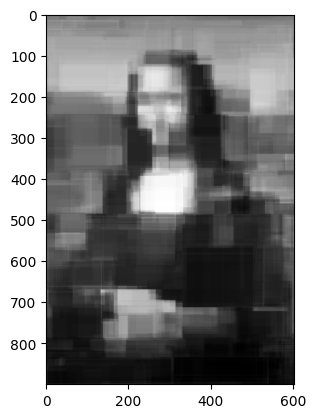

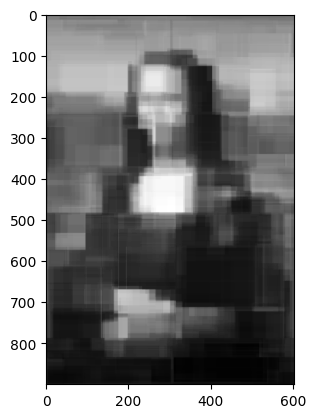

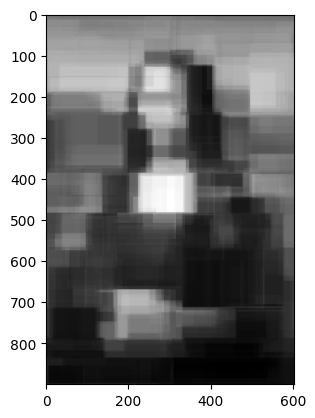

In [9]:
def disp_pruning_results(pars):
    i = 1
    for min_samples_split in pars['min_samples_split']:
        for min_samples_leaf in pars['min_samples_leaf']:
            title = "min_samples_split=" + str(min_samples_split) + " min_samples_leaf=" + str(min_samples_leaf)
            img_rf = pruning_experimentation(depth=10,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf)
            i += 1

params = {'min_samples_split' : [3, 10, 20],
          'min_samples_leaf' : [1]}
disp_pruning_results(params)

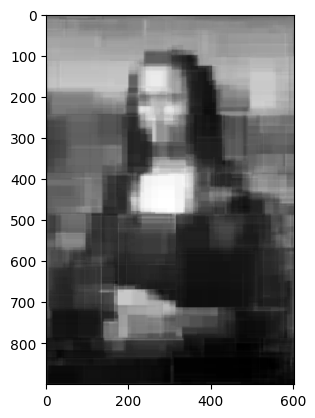

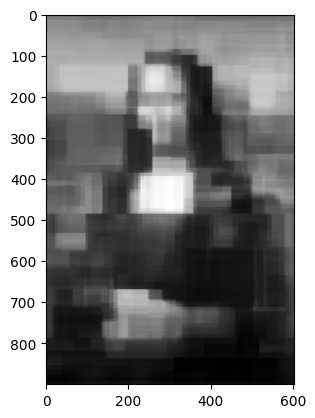

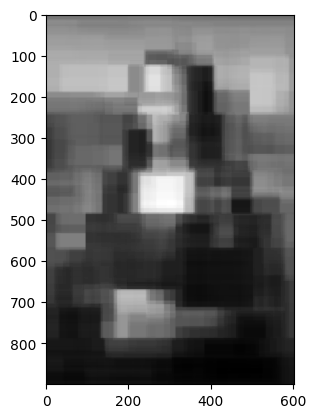

In [10]:
params = {'min_samples_split' : [3],
          'min_samples_leaf' : [1, 5, 10]}
disp_pruning_results(params)

**2f) Analysis**

The decision rule at each split point in a decision tree within a Random Forest is based on a feature and a threshold value. At each node, the algorithm selects the feature that best separates the data based on a certain criterion and then determines the threshold value for that feature to split the data.

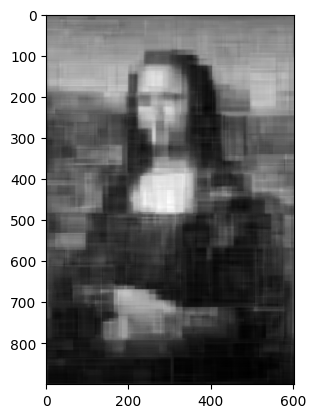

Feature index at root node: 0
Threshold value at root node: 485.5


In [11]:
RF = pruning_experimentation(20, 50, 3, 1)

first_tree = RF.estimators_[0]

# Extracting the feature and threshold for the split at the root node
feature_index = first_tree.tree_.feature[0]
threshold_value = first_tree.tree_.threshold[0]

# Printing the feature index and threshold value at the root node
print(f"Feature index at root node: {feature_index}")
print(f"Threshold value at root node: {threshold_value}")

The split point at the root node involve the feature X and a threshold value T. For a simple binary split:

The decision rule: if X <= 486.5, go left; else, go right. The specific feature X and threshold value T are determined during the training process based on the chosen criterion for splitting the data at each node.

**ii)**

The resulting image above generated by a decision tree or a Random Forest Regressor often appears as a mosaic of patches of colors due to the nature of the decision-making process.

**Shape**: The patches of color tend to be square or rectangular in shape.

Each split in the decision tree or Random Forest creates a binary division along a specific feature axis. The resulting partitions in the input space (or image space, in this case) are essentially rectangles or squares that represent the regions where certain decisions based on the trained model are made.

Arrangement: These patches are arranged in a grid-like pattern across the image.

Within each rectangular or square region, the model assigns the same predicted value (in the case of regression) based on the majority of samples within that region. Therefore, each patch of color represents the predicted value assigned to that region by the decision tree or forest.

The arrangement of these patches of color reflects the grid-like structure of the underlying decision boundaries created by the trees based on their split decisions along specific feature axes.